# **Laboratory Task 6**

Instruction: Convert the following CNN architecture diagram into a PyTorch CNN Architecture.

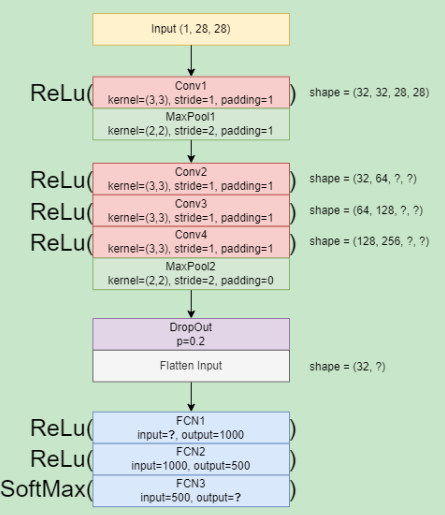

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
       
        # Convolution Block 1
        # Input: 1 × 28 × 28
        # Conv1: (3×3, stride=1, pad=1) → 32 × 28 × 28
        self.conv1 = nn.Conv2d(1, 32, (3,3), 1, 1)

        # MaxPool1: (2×2, stride=2, pad=1) → 32 × 15 × 15
        self.pool1 = nn.MaxPool2d((2,2), 2, 1)

        # Convolution Block 2
        # Conv2: (3×3, stride=1, pad=1) → 64 × 15 × 15
        self.conv2 = nn.Conv2d(32, 64, (3,3), 1, 1)

        # Conv3: (3×3, stride=1, pad=1) → 128 × 15 × 15
        self.conv3 = nn.Conv2d(64, 128, (3,3), 1, 1)

        # Conv4: (3×3, stride=1, pad=1) → 256 × 15 × 15
        self.conv4 = nn.Conv2d(128, 256, (3,3), 1, 1)

        # MaxPool2: (2×2, stride=2, pad=0) → 256 × 7 × 7
        self.pool2 = nn.MaxPool2d((2,2), 2, 0)

        # Dropout layer (p=0.2)
        self.dropout = nn.Dropout(0.2)


        # Fully Connected Layers
        # Flatten: 256×7×7 = 12544 → input to FC
        self.fcn1 = nn.Linear(256*7*7, 1000)  # FC1: 12544 → 1000
        self.fcn2 = nn.Linear(1000, 500)      # FC2: 1000 → 500
        self.fcn3 = nn.Linear(500, num_classes) # FC3: 500 → num_classes

    def forward(self, x):
        # --- Convolution Block 1 ---
        x = F.relu(self.conv1(x))   # Conv1 + ReLU
        x = self.pool1(x)           # MaxPool1

        # --- Convolution Block 2 ---
        x = F.relu(self.conv2(x))   # Conv2 + ReLU
        x = F.relu(self.conv3(x))   # Conv3 + ReLU
        x = F.relu(self.conv4(x))   # Conv4 + ReLU
        x = self.pool2(x)           # MaxPool2

        # --- Flatten + Dropout ---
        x = x.view(x.size(0), -1)   # Flatten to (batch, 12544)
        x = self.dropout(x)         # Dropout (p=0.2)

        # --- Fully Connected Layers ---
        x = F.relu(self.fcn1(x))    # FC1 + ReLU
        x = F.relu(self.fcn2(x))    # FC2 + ReLU
        x = self.fcn3(x)            # FC3 (raw logits)

        # --- Softmax for probabilities ---
        x = F.softmax(x, dim=1)

        return x


In [3]:
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (fcn1): Linear(in_features=12544, out_features=1000, bias=True)
  (fcn2): Linear(in_features=1000, out_features=500, bias=True)
  (fcn3): Linear(in_features=500, out_features=10, bias=True)
)
